In [1]:
# Created on Mar 12, 2023
# Logistic Regression
# Machine Learning in Action
# @author: Emil Bobev

In [291]:
# importing important librarires 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

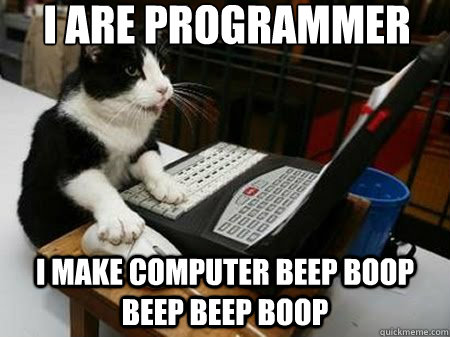

In [1]:
# Don't Panic!
from IPython import display
cat = display.Image("https://rforcats.net/assets/img/programmer.png")
cat

<AxesSubplot: xlabel='CulmenLength_mm', ylabel='BodyMass_g'>

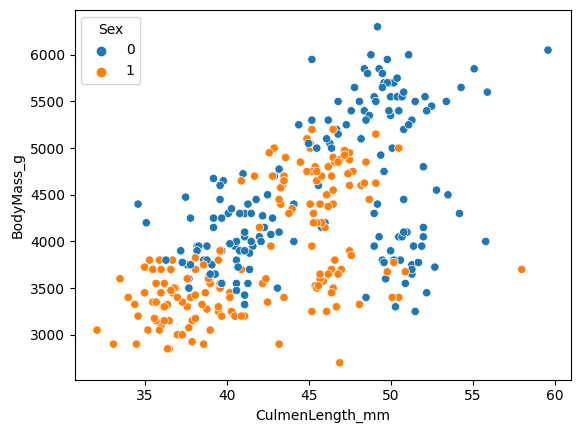

In [159]:
#reading in the data 
penguins = pd.read_csv("penguins.csv")
penguins = penguins[["CulmenLength_mm","BodyMass_g","Sex"]] # trimming the data to the columns we are going to be useing 
penguins = penguins.dropna() # removing NaN values 
penguins['Sex'].replace({'MALE': 0, 'FEMALE': 1},inplace= True) # replacing male with 0 and female with 1 for a binary results 
# Plot the data
penguins = penguins[penguins['Sex'] != '.'] 
sns.scatterplot(x='CulmenLength_mm', y='BodyMass_g', hue='Sex', data=penguins)


In [163]:
def autoNorm(penguins): #implementing min-max normalization
    # calculate the ranges and minimum values of each column
    ranges = penguins.max() - penguins.min() # difference between the maximum and minimum values) of each column
    minVals = penguins.min() # calculates the minimum value of each column
    normDataSet = (penguins - minVals) / ranges # apply normalization
    return normDataSet, ranges, minVals #returns a tuple containing the normalized dataset


In [164]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(penguins[['CulmenLength_mm', 'BodyMass_g']], penguins['Sex'], test_size=0.2, random_state=42)
# Normalize the input data
X_train_norm, ranges, minVals = autoNorm(X_train) 


In [165]:
# sanity check to see ho my training and testing data looks 
print ("Shape of X_train:", X_train.shape)
print ("Shape of y_train:", y_train.shape)
print ("Shape of X_test:", X_test.shape)
print ("Shape of y_test:", y_test.shape)

Shape of X_train: (266, 2)
Shape of y_train: (266,)
Shape of X_test: (67, 2)
Shape of y_test: (67,)


In [166]:
#define the sigmoid funcition 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [247]:
# define gradiend descent function 
def gradient(X, y, weights):
    y_pred = sigmoid(np.dot(X, weights))
    return np.dot(X.T, y_pred - y)/len(y)

In [221]:
#define loss function 
def loss(X, y, weights,epsilon=1e-7):
    y_pred = sigmoid(np.dot(X, weights))
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    y = np.clip(y, epsilon, 1 - epsilon)
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))


In [262]:
# train logistic regression model using gradient descent
def logreg2(x, y, lr, num_iterations): #takes in input and output x and y and lr as learning rate and the number of iterations to train the model
    x = np.hstack((np.ones((x.shape[0], 1)), x)) # adds a column of ones to account for the bias term in the log regression 
    weights = np.random.rand(x.shape[1])-0.5 # initializes the weights of the logistic regression model with values -0.5 to 0.5
    weights *= 0.01 #scales the initialized weights by a factor of 0.01. This ensures weights are small and model converges fast 
    for i in range(num_iterations): # initiating a loop that iteratively updates the weight
        grad = gradient(x, y, weights) #computeing the gradient of the logistic regression loss function with respect to the weights
        #print(grad)
        weights = -(lr * grad) + weights # update the weights of the logistic regression model using the gradient descent algorithm
        #print(weights)
        loss_value = loss(x, y, weights) #loss function measures how well the model fits the data
        print(f'Iteration {i}, Loss: {loss_value}')
    return weights

w = logreg2(X_train_norm, y_train, 0.1, 4200)

Iteration 0, Loss: 0.6929051036039172
Iteration 1, Loss: 0.6924089695498792
Iteration 2, Loss: 0.6919313350635371
Iteration 3, Loss: 0.6914709781313989
Iteration 4, Loss: 0.6910267596577673
Iteration 5, Loss: 0.6905976178989089
Iteration 6, Loss: 0.6901825632592031
Iteration 7, Loss: 0.6897806734275693
Iteration 8, Loss: 0.68939108883348
Iteration 9, Loss: 0.6890130084028958
Iteration 10, Loss: 0.688645685595455
Iteration 11, Loss: 0.6882884247052399
Iteration 12, Loss: 0.6879405774084056
Iteration 13, Loss: 0.6876015395418853
Iteration 14, Loss: 0.6872707480982909
Iteration 15, Loss: 0.6869476784229943
Iteration 16, Loss: 0.686631841600197
Iteration 17, Loss: 0.686322782015604
Iteration 18, Loss: 0.6860200750840565
Iteration 19, Loss: 0.6857233251312091
Iteration 20, Loss: 0.6854321634190172
Iteration 21, Loss: 0.6851462463054367
Iteration 22, Loss: 0.6848652535293624
Iteration 23, Loss: 0.6845888866123984
Iteration 24, Loss: 0.6843168673695967
Iteration 25, Loss: 0.68404893652182
Ite

In [268]:
x_test_norm, r, n = autoNorm(X_test) #normalize the test features
x_test_norm = np.hstack((np.ones((x_test_norm.shape[0], 1)), x_test_norm)) #adding a column of ones to the left of the normalized test features, in order to account for the bias
predictions = sigmoid(np.dot(x_test_norm, w )) #computeing the predicted probabilities for the test set
predictions2 = np.where(predictions >= 0.5, 1, 0 ) #converting the predicted probabilities into binary predictions
predictions2


array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1])

In [303]:
y_true = np.array(y_test)
y_pred = np.array(predictions2)
labels = np.unique(np.concatenate((y_true, y_pred)))  # get unique values in y_true and y_pred arrays
conf_matrix = np.zeros((len(labels), len(labels))) # initialize confusion matrix with zeros


for i in range(len(y_true)): # populate confusion matrix
    true_index = np.where(labels == y_true[i])[0][0]
    pred_index = np.where(labels == y_pred[i])[0][0]
    conf_matrix[true_index][pred_index] += 1

print(f"Confusion matrix values{conf_matrix}")
print(f"Weight values{w}") #weights of the logistic regression model


Confusion matrix values[[19. 11.]
 [13. 24.]]
Weight values[ 2.09448197 -1.90642499 -3.27060893]


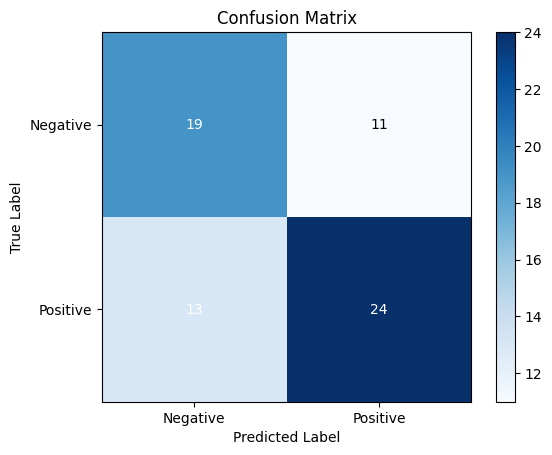

In [299]:

confusion = np.array(conf_matrix) # define the confusion matrix values
labels = ['Negative', 'Positive'] # define the labels for the matrix

fig, ax = plt.subplots()# create the confusion matrix plot
im = ax.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion.shape[1]),
       yticks=np.arange(confusion.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = confusion.max() / 2. # add annotations to the plot
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(j, i, format(confusion[i, j], '.0f'),
                ha="center", va="center",
                color="white" if confusion[i, j] > thresh else "black")

# show the plot
plt.show()

